## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable
import pyregion

fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
#rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'sedFigs/annuli/'
regDir = rootDir+'inIms/'+'regions/'

nameRoot = ['ELobeAn','WLobeAn']

ELobeDir = rootDir+'ELobe/'
WLobeDir = rootDir+'WLobe/'
#CoreDir = rootDir+'kore/'

dirNames = [ELobeDir,WLobeDir]

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [2]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_CI_over_CIOFF(tot,mod_CI,mod_CIOFF,mod_JP,statsCI,statsCIOFF,statsJP,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod_CI[0] - 30)).argmin()
    totplot = ax1.errorbar(tot['Frequency [MHz]'],tot['Integrated Flux [Jy]'], yerr=tot['Error [Jy]'],
             marker='o', color=color_plot[0], linestyle=' ',label=labe,capsize=6) 
    
    ax1.plot(mod_CI[0][idx_min:idx_max],mod_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle=':',label='CI',alpha=0.5)


    idx_br = (np.abs(mod_CI[0] - float(statsCI['break']))).argmin()
    ax1.axvline(statsCI['break'],ymin=0,ymax=0.58,ls=':',c=color_plot[1],lw=2,alpha=0.5)

        
    ax1.plot(mod_JP[0][idx_min:idx_max],mod_JP[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle='-.',label='JP',alpha=0.5)
    idx_br = (np.abs(mod_CI[0] - float(statsJP['break']))).argmin()
    ax1.axvline(statsJP['break'],ymin=0,ymax=0.58,ls='-.',c=color_plot[1],lw=2,alpha=0.5)
   

    ax1.plot(mod_CIOFF[0][idx_min:idx_max],mod_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[2], linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod_CIOFF[0] - float(statsCIOFF['break']))).argmin()
    ax1.axvline(statsCIOFF['break'],ymin=0,ymax=0.55,ls='--',c=color_plot[2],lw=2,alpha=0.5)
    


    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


	+---------+
	ELobeAn0
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.02529104 |
|    break     |   6664.166  |
|    chisq     |   45.16903  |
|    chired    |   3.226359  |
|  break_inf   |  -3274.857  |
|    alpha     |  0.5361387  |
|     ndf      |     14.0    |
| alpha_errinf | -0.06365581 |
|     norm     |  0.8008699  |
|  break_sup   |   2108.124  |
+--------------+-------------+ +--------------+-------------+
|    CIOFF     |    value    |
+--------------+-------------+
|   t_errinf   | -0.05720441 |
|    tratio    |  0.07314742 |
|   t_errsup   |  0.01236795 |
|    break     |   4894.432  |
|    chisq     |   38.04523  |
|    alpha     |  0.4837057  |
| alpha_errinf |  -0.0837057 |
| alpha_errsup |  0.03045537 |
|    chired    |   2.926556  |
|     ndf      |     13.0    |
|  break_inf   |  -2899.754  |
|  break_sup   |   272.3418  |
|     norm     |  0.9838677  |
+--------------+-------------+ +--

	+---------+
	ELobeAn6
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.01782252 |
|    break     |   15249.06  |
|    chisq     |   47.47527  |
|    chired    |   3.39109   |
|  break_inf   |   -9556.4   |
|    alpha     |  0.5908611  |
|     ndf      |     14.0    |
| alpha_errinf | -0.07362427 |
|     norm     |  0.7908355  |
|  break_sup   |   4673.461  |
+--------------+-------------+ +--------------+------------+
|    CIOFF     |   value    |
+--------------+------------+
|   t_errinf   | -0.2655589 |
|    tratio    | 0.2665589  |
|   t_errsup   | 0.09877398 |
|    break     |  37226.47  |
|    chisq     |  45.77123  |
|    alpha     | 0.6092418  |
| alpha_errinf | -0.1007835 |
| alpha_errsup | 0.02871389 |
|    chired    |  3.520864  |
|     ndf      |    13.0    |
|  break_inf   | -31403.33  |
|  break_sup   |  3382.925  |
|     norm     | 0.4312757  |
+--------------+------------+ +--------------+----

	+---------+
	WLobeAn5
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.02878453 |
|    break     |   7876.329  |
|    chisq     |   35.59754  |
|    chired    |   2.542681  |
|  break_inf   |  -3746.605  |
|    alpha     |  0.6164981  |
|     ndf      |     14.0    |
| alpha_errinf | -0.05825975 |
|     norm     |   3.386926  |
|  break_sup   |   1683.54   |
+--------------+-------------+ +--------------+------------+
|    CIOFF     |   value    |
+--------------+------------+
|   t_errinf   | -0.0709992 |
|    tratio    | 0.09331892 |
|   t_errsup   | 0.03083047 |
|    break     |  7796.503  |
|    chisq     |  27.33188  |
|    alpha     | 0.5875544  |
| alpha_errinf | -0.1200158 |
| alpha_errsup | 0.02868427 |
|    chired    |  2.102452  |
|     ndf      |    13.0    |
|  break_inf   | -5251.127  |
|  break_sup   |  3065.984  |
|     norm     |  3.520535  |
+--------------+------------+ +--------------+----

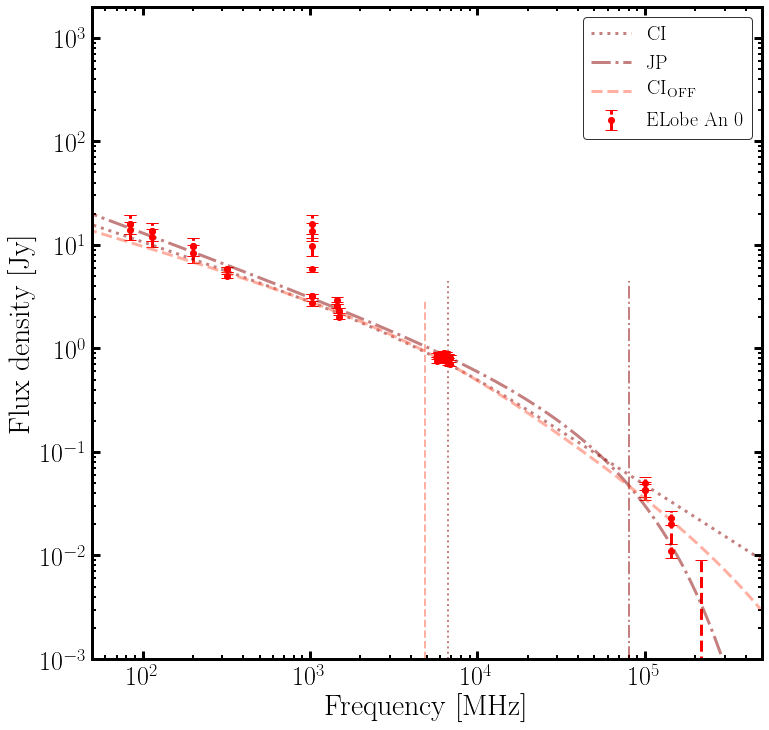

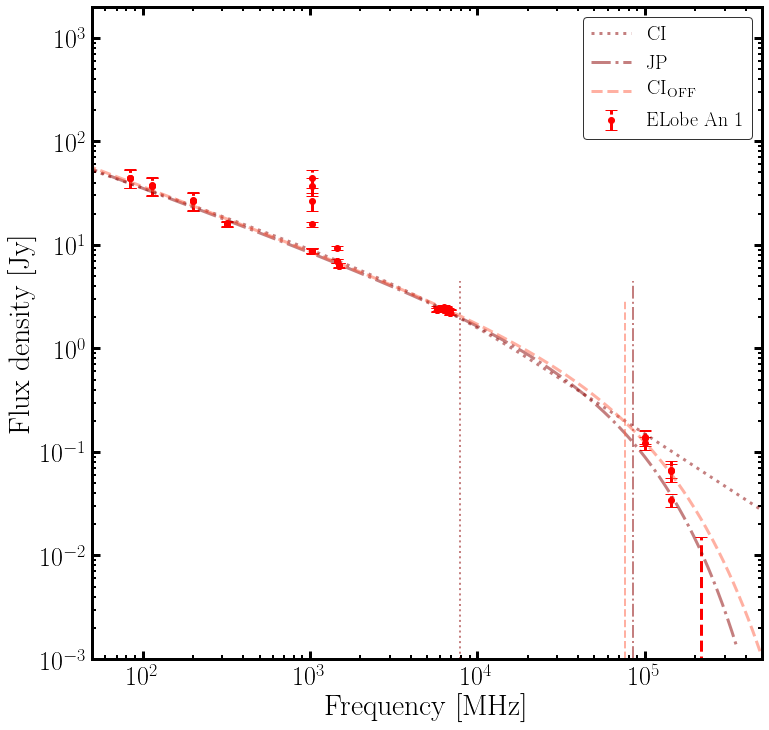

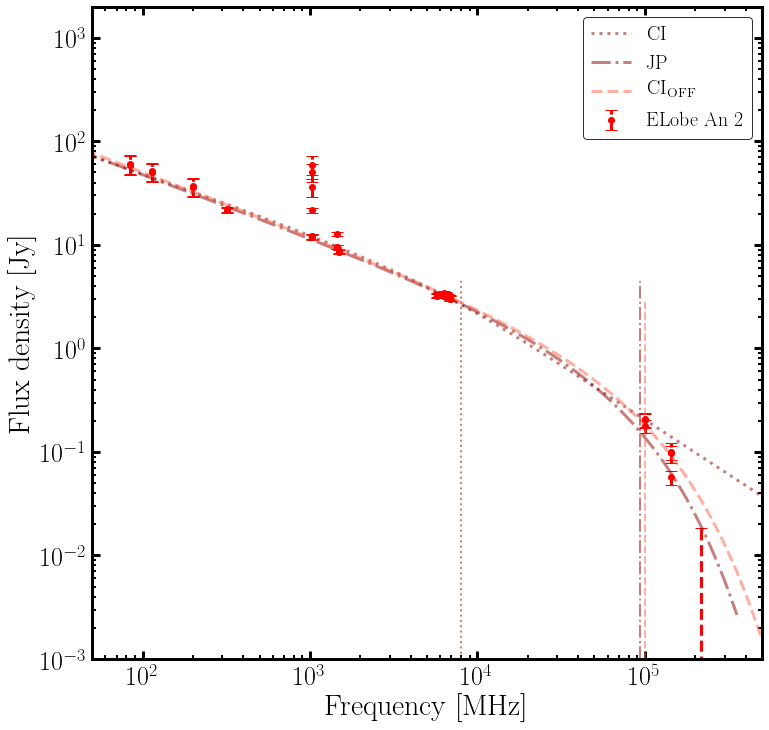

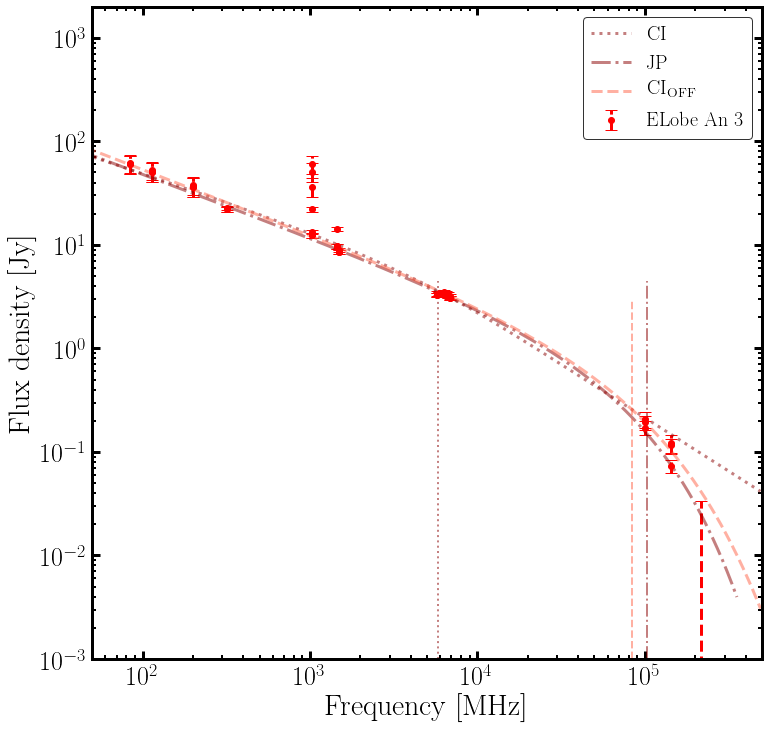

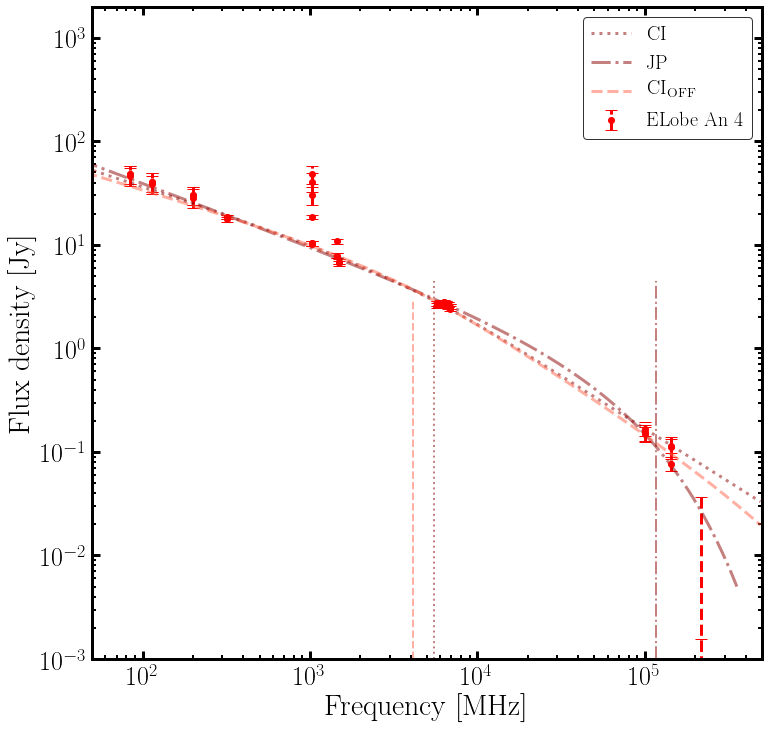

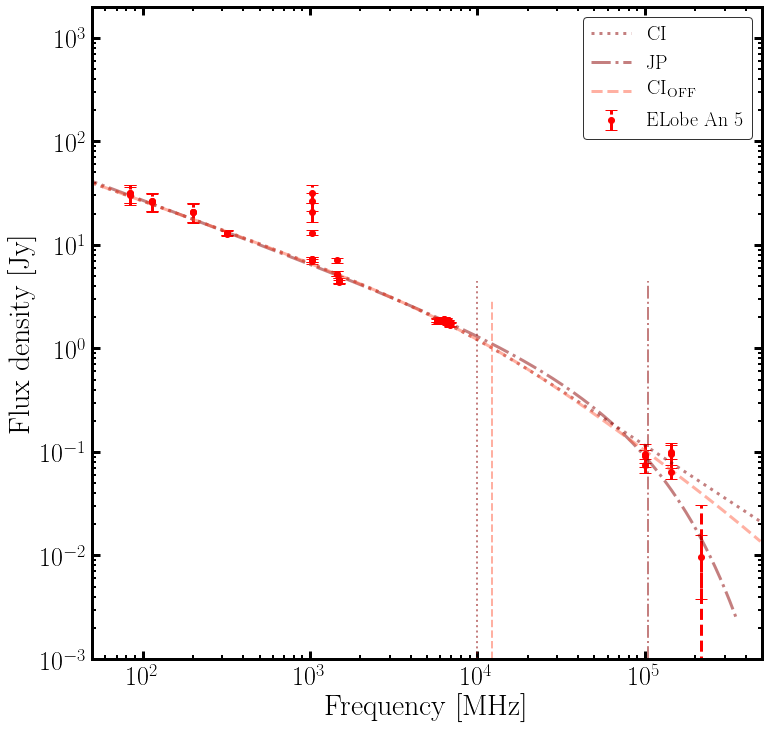

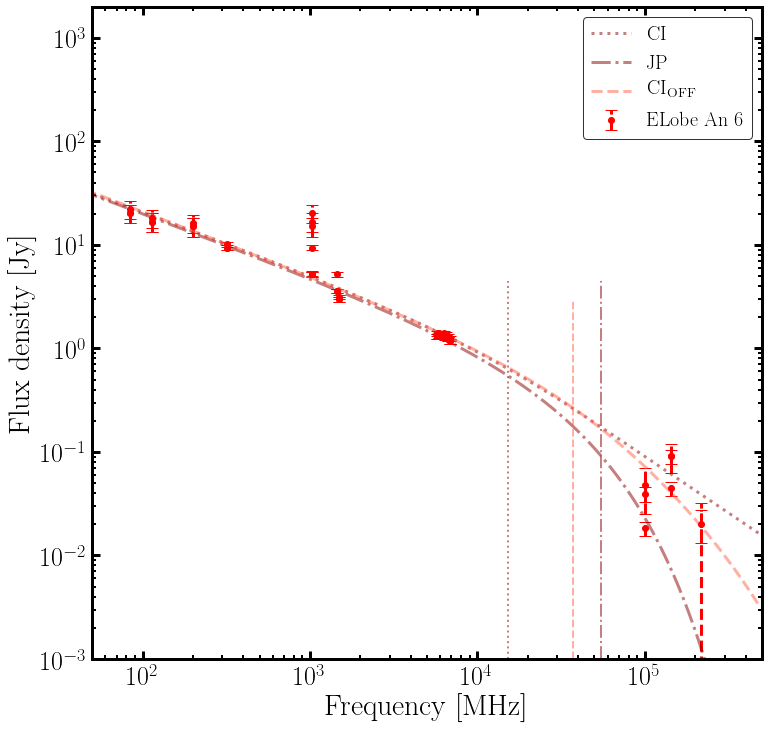

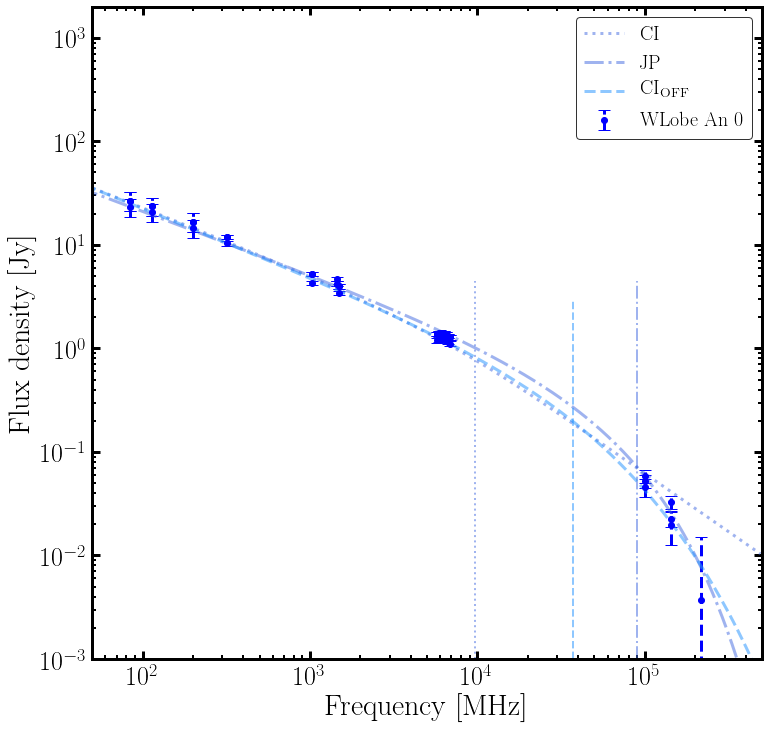

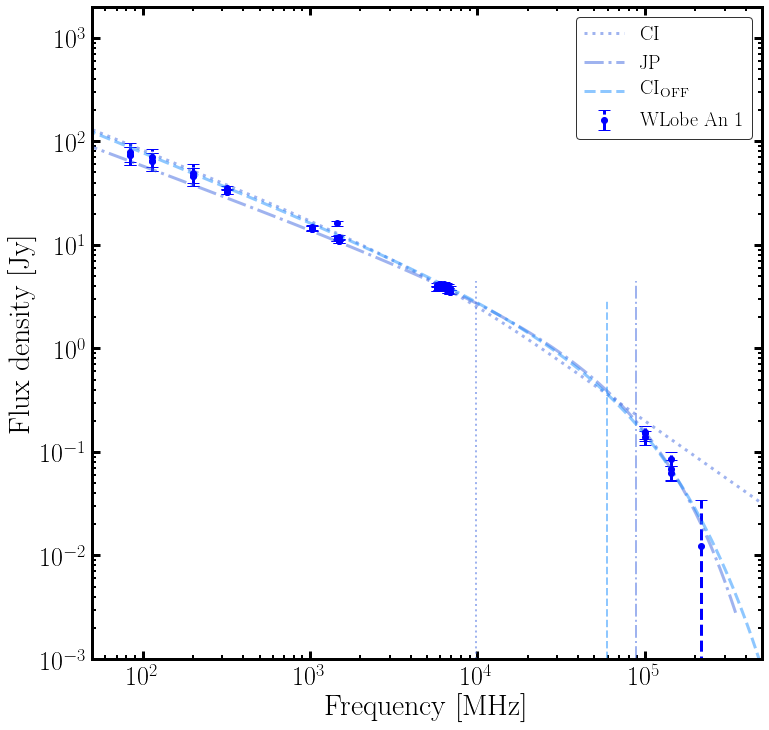

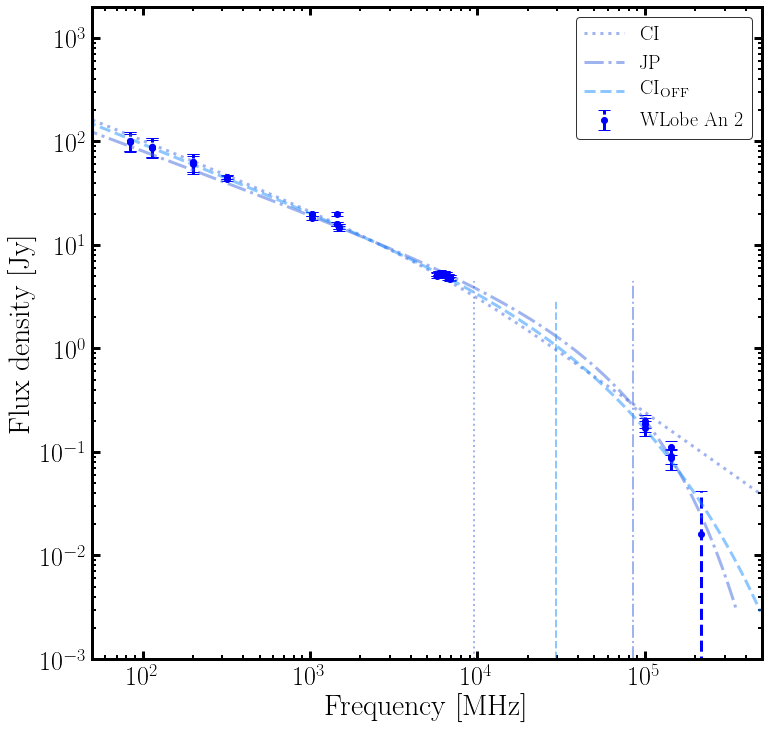

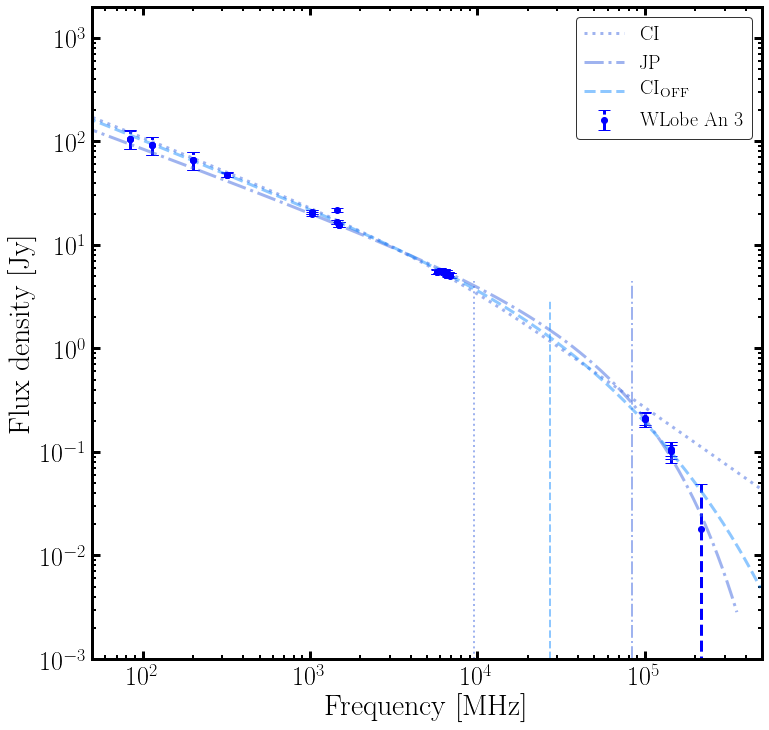

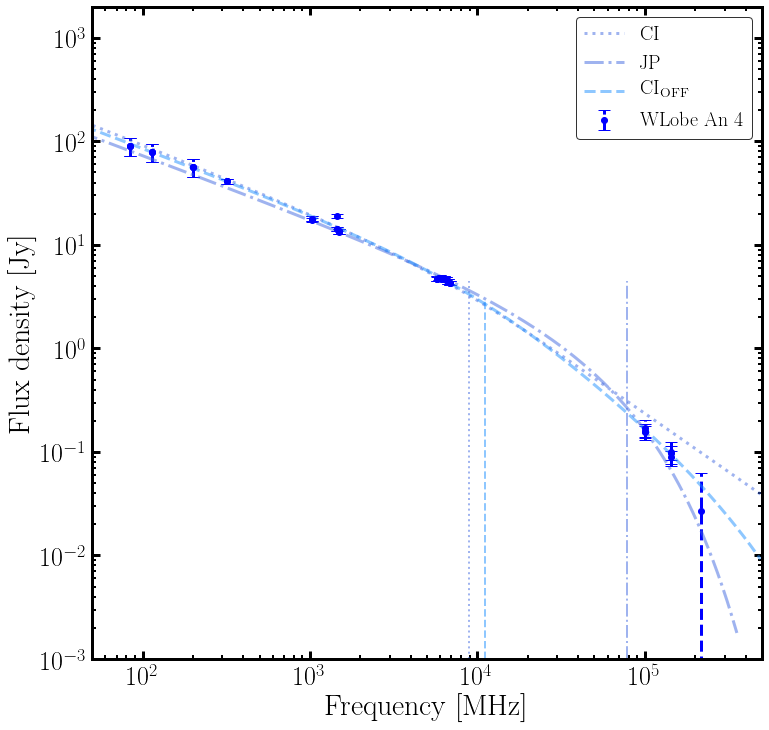

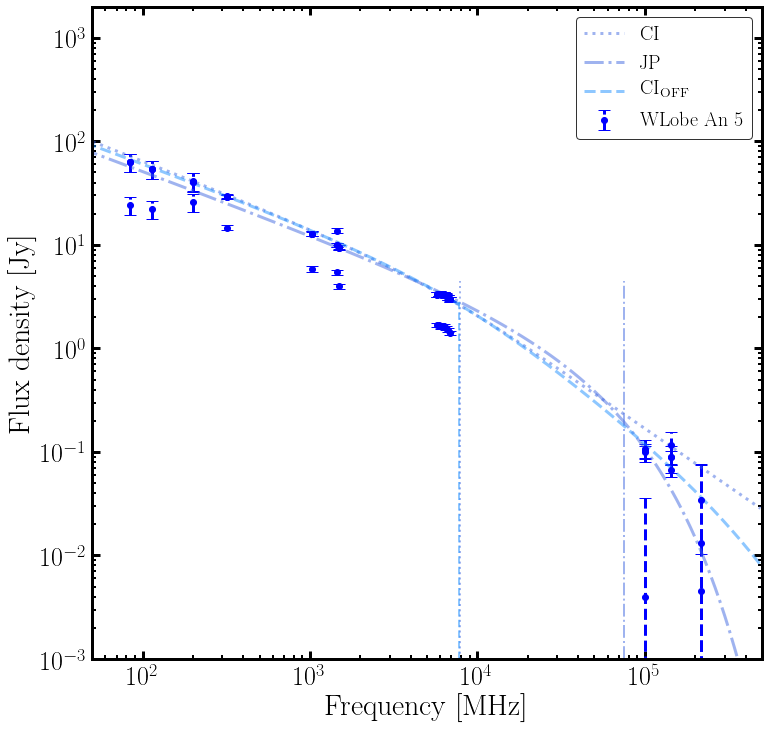

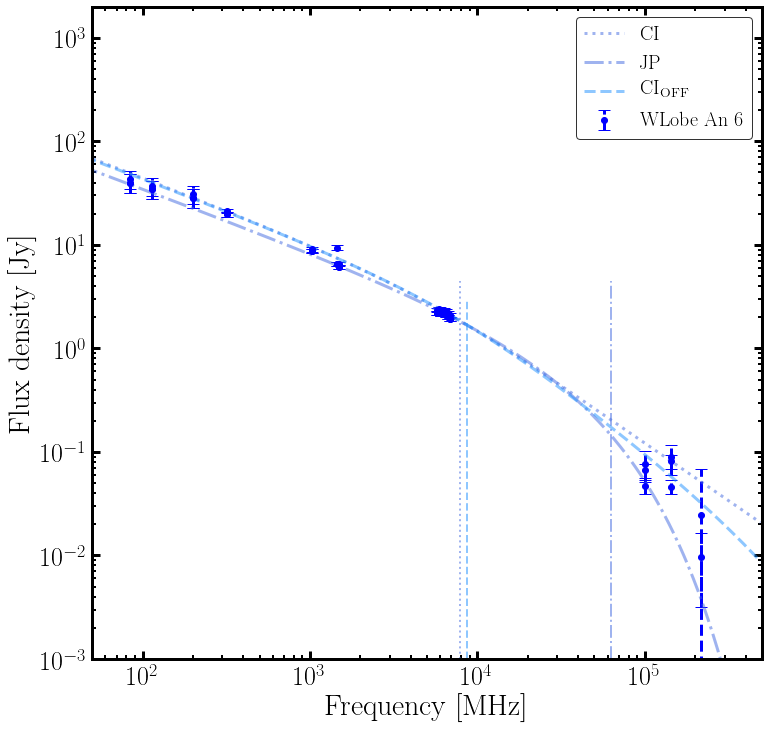

In [3]:
lobe = ['ELobe','WLobe']
lobeAcr = ['EL','WL']

colorW = ['blue','royalblue','dodgerblue']
colorE = ['red','darkred','tomato']
colors = [colorE,colorW]


breaksCI = np.zeros([2,7,4])
chiCI = np.zeros([2,7,2])

breaksCI[:,:,3] = [145,290,435,580,725,865,1010]
breaksCI[:,:,3] *= 101/1e3
chiCI[:,:,1] = breaksCI[:,:,3].copy()

breaksCIOFF = np.zeros([2,7,4])
chiCIOFF = np.zeros([2,7,2])


breaksCIOFF[:,:,3] = [145,290,435,580,725,865,1010]
breaksCIOFF[:,:,3] *= 101/1e3
chiCIOFF[:,:,1] = breaksCIOFF[:,:,3].copy()


breaksJP = np.zeros([2,7,4])

chiJP = np.zeros([2,7,2])
breaksJP[:,:,3] = [145,290,435,580,725,865,1010]
breaksJP[:,:,3] *= 101/1e3
chiJP[:,:,1] = breaksJP[:,:,3].copy()


anNum=[]

for j in xrange(0,len(nameRoot)):
    cl = colors[j]
    for i in xrange(0,7):
        
        del anNum[:]

        anNum.append(str(i))
   
        statsJP = syn.readCIStats(dirNames[j]+'synOut/'+nameRoot[j]+anNum[0]+'JP.stats')
        statsCI = syn.readCIStats(dirNames[j]+'synOut/'+nameRoot[j]+anNum[0]+'CI.stats')
        statsCIOFF =  syn.readCIOFFStats(dirNames[j]+'synOut/'+nameRoot[j]+anNum[0]+'CIOFF.stats')

        Lobe= ascii.read(dirNames[j]+lobeAcr[j]+'FluxesAn'+anNum[0]+'.tbl', fast_reader=False)

        
        LobeModCI = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'An'+anNum[0]+'CI_point1_fit.dat')
        LobeModJP = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'An'+anNum[0]+'JP_point1_fit.dat')
        LobeModCIOFF = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'An'+anNum[0]+'CIOFF_point1_fit.dat')        
        
        #flArr= ascii.read(rootDir+names[i]+'/'+names[i]+'Fluxes.tbl', fast_reader=False)
        #modCI = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CI_point1_fit.dat')
        #modCIOFF = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CIOFFCore_point1_fit.dat')

        print '''\t+---------+\n\t'''+nameRoot[j]+str(i)+'''\n\t+---------+'''

        CI = PrettyTable(['CI', 'value'])
        for key, val in statsCI.items():
            CI.add_row([key, val])


        CIOFF = PrettyTable(['CIOFF', 'value'])
        for key, val in statsCIOFF.items():
            CIOFF.add_row([key, val])
            
        JP = PrettyTable(['JP', 'value'])
        for key, val in statsJP.items():
            JP.add_row([key, val])
        
        print CI, CIOFF, JP

        
        breaksCI[j,i,0] = statsCI['break']/1e3
        breaksCIOFF[j,i,0] = statsCIOFF['break']/1e3
        breaksJP[j,i,0] = statsJP['break']/1e3
        
        chiJP[j,i,0] = statsJP['chired']
        chiCI[j,i,0] = statsCI['chired']
        chiCIOFF[j,i,0] = statsCIOFF['chired']

        breaksCI[j,i,1] = statsCI['break_inf']/1e3
        breaksCIOFF[j,i,1] = statsCIOFF['break_inf']/1e3
        breaksJP[j,i,1] = statsJP['break_inf']/1e3

        breaksCI[j,i,2] = statsCI['break_sup']/1e3
        breaksCIOFF[j,i,2] = statsCIOFF['break_sup']/1e3
        breaksJP[j,i,2] = statsJP['break_sup']/1e3
        
        outplot = figDir+lobe[j]+'_CICIOFFAn'+str(i)+'.png'
        plot_CI_over_CIOFF(Lobe,LobeModCI,LobeModCIOFF,LobeModJP,statsCI,statsCIOFF,statsJP,lobe[j]+' An '+str(i),cl,outplot)

            
            
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


In [4]:
def plot_breaks(breaks,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Radius [kpc]')
    ax1.set_ylabel(r'$\nu_{\rm break}$ [GHz]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-1,2e3])
    #ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    eb1 = ax1.errorbar(breaks[0,:,3],breaks[0,:,0],yerr=[-breaks[0,:,1],breaks[0,:,2]],
                color='red',label='East Lobe',capsize=6,markersize=10,fmt='-.o') 
    eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.errorbar(breaks[1,:,3],breaks[1,:,0],yerr=[-breaks[1,:,1],breaks[1,:,2]],
                 color='blue',label='West Lobe',capsize=6,markersize=10,fmt='--o') 
    eb2[-1][0].set_linestyle('--')

    legend = plt.legend(loc=3, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


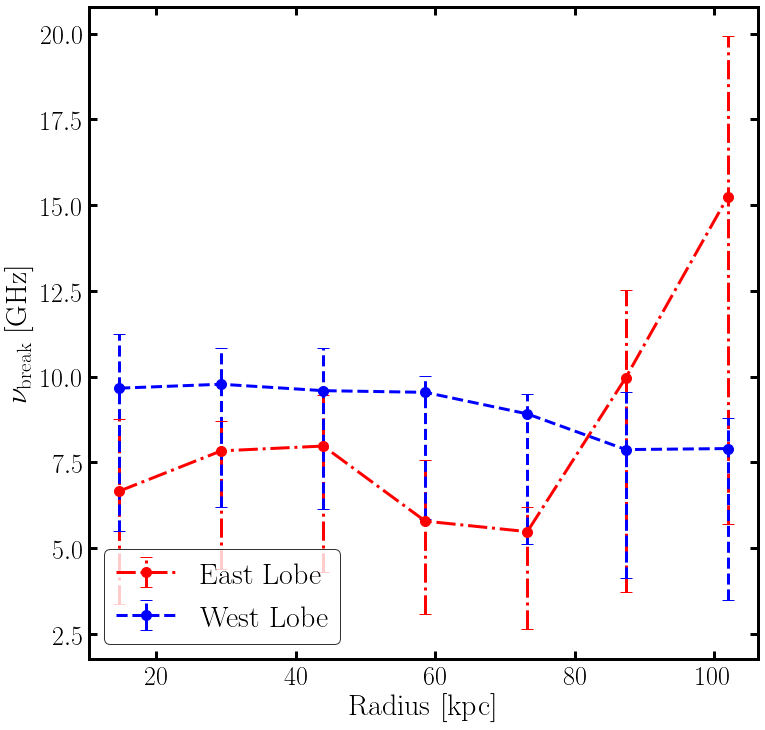

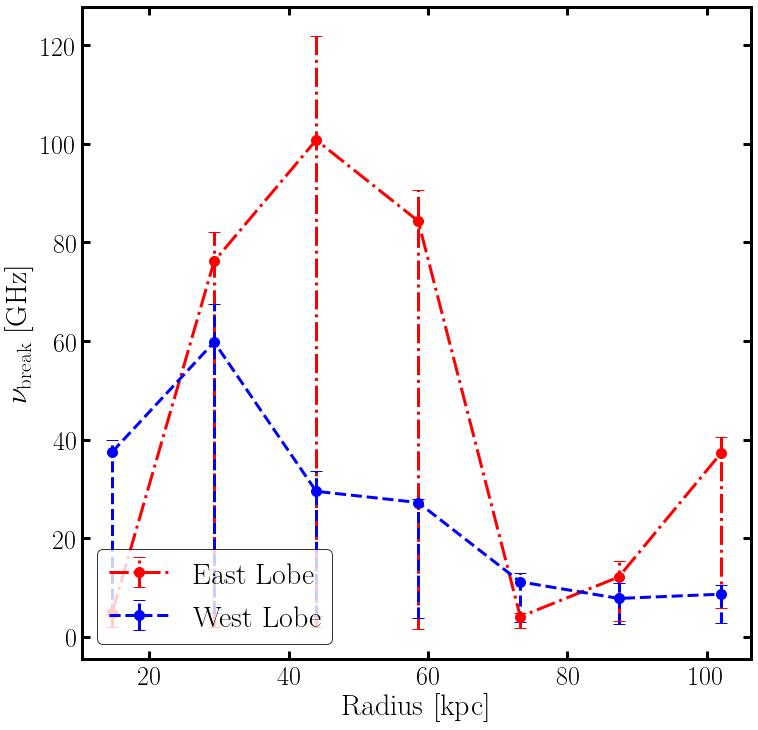

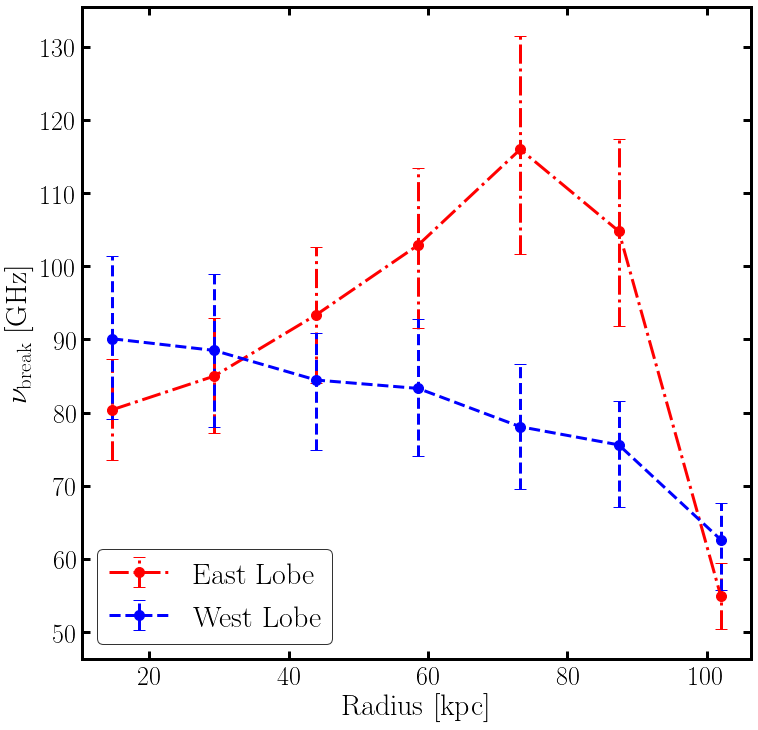

In [5]:
outplot = figDir+'BreakAnCI.png'
plot_breaks(breaksCI,outplot)

outplot = figDir+'BreakAnCIOFF.png'
plot_breaks(breaksCIOFF,outplot)

outplot = figDir+'BreakAnJP.png'
plot_breaks(breaksJP,outplot)


	-----> Loaded <-----


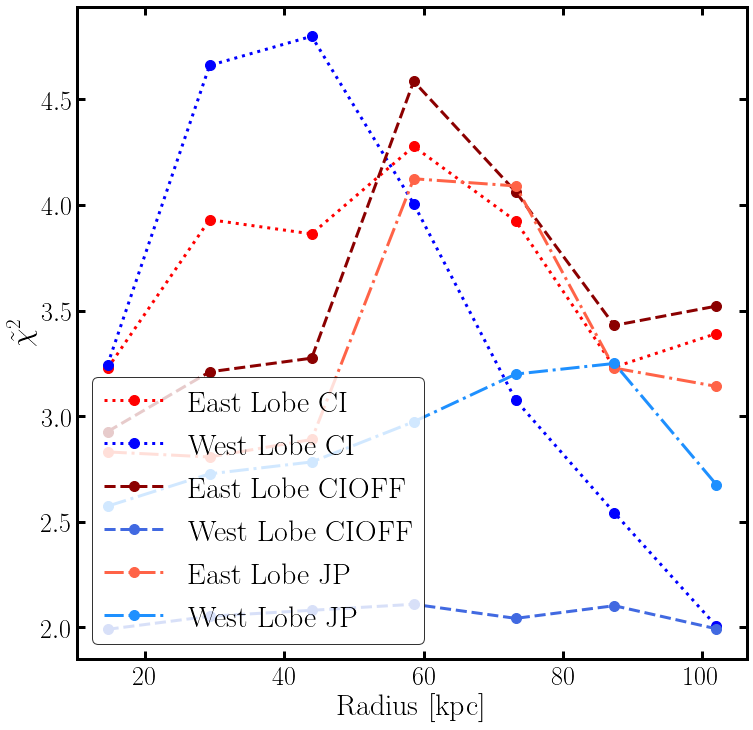

In [12]:
def plot_chis(chisCI,chisCIOFF,chisJP,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Radius [kpc]')
    ax1.set_ylabel(r'$\tilde{\chi}^2$')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-1,2e3])
    #ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    eb1 = ax1.plot(chisCI[0,:,1],chisCI[0,:,0],
                color='red',label='East Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisCI[1,:,1],chisCI[1,:,0],
                 color='blue',label='West Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(chisCIOFF[0,:,1],chisCIOFF[0,:,0],
                color='darkred',label='East Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisCIOFF[1,:,1],chisCIOFF[1,:,0],
                 color='royalblue',label='West Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(chisJP[0,:,1],chisJP[0,:,0],
                color='tomato',label='East Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisJP[1,:,1],chisJP[1,:,0],
                 color='dodgerblue',label='West Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb2[-1][0].set_linestyle('--')
    
    
    legend = plt.legend(loc=3, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'

#outplot = figDir+'ChiAnCI.png'
#plot_breaks(chiCI,outplot)

outplot = figDir+'ChiAnCIOFF.png'
plot_chis(chiCI,chiCIOFF,chiJP,outplot)

#outplot = figDir+'ChiAnJP.png'
#plot_breaks(chiJP,outplot)

In [20]:
lobe = ['E','W']

#regions = [totReg, elReg, wlReg]

breaksJP = np.zeros([2,7,4])
breaksJP[:,:,3] = [145,290,435,580,725,865,1010]
breaksJP[:,:,3] *= 101/1e3

fileName = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency.FITS'

datas,heads = fint.openFile(fileName)
datas=np.squeeze(datas)
fileName = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency_ERR.FITS'
datasErr,headsErr = fint.openFile(fileName)
datasErr=np.squeeze(datasErr)

for k in xrange(0,2):
        
        for j in xrange (0,7):
            region = regDir+lobe[k]+'an'+str(j)+'.reg'
            print region
            r = pyregion.open(region).as_imagecoord(heads)
            shape = (heads['NAXIS2'], heads['NAXIS1'])
            m = r.get_mask(shape=shape)

            breaksJP[k,j,0] = np.nanmedian(datas[m==True])/1e3
            print  breaksJP[k,j,0]
            breaksJP[k,j,1] = -np.nanmedian(datasErr[m==True])/1e3
            breaksJP[k,j,2] = -breaksJP[k,j,1]

print '''\t+---------+\n\t Fluxes measured\n\t Tables Saved\n\t+---------+'''
  

/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean0.reg
101.762375
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean1.reg
102.8479296875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean2.reg
110.67596875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean3.reg
119.9906875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean4.reg
128.7148125
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean5.reg
129.720734375
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Ean6.reg
144.298921875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Wan0.reg
81.5094921875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Wan1.reg
78.4371484375
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Wan2.reg
77.589765625
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Wan3.reg
82.1866015625
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/Wan4.reg
82.3198828125
/home/maccagni/Projects/

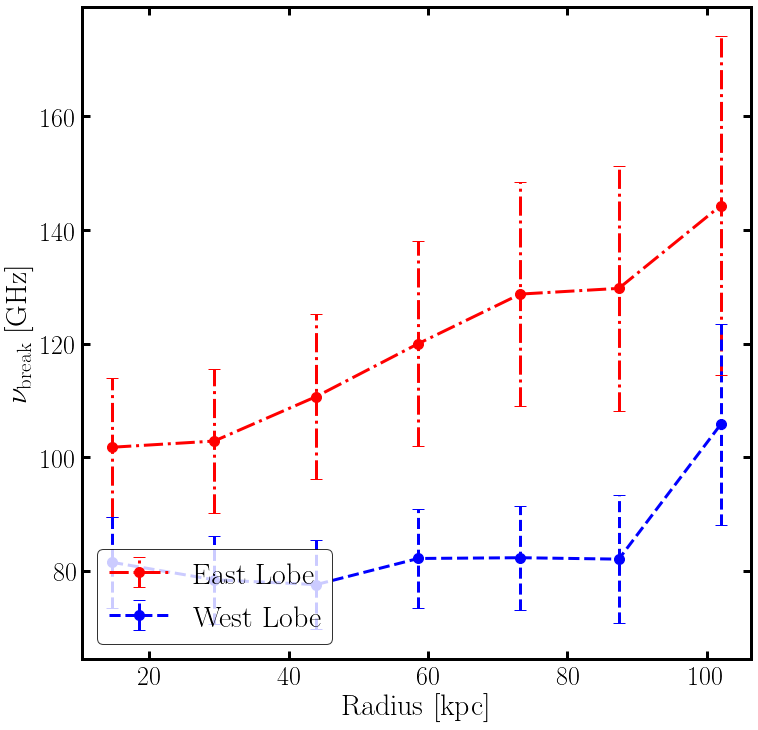

In [21]:
outplot = figDir+'BreakAnJP_map.png'
plot_breaks(breaksJP,outplot)